#### Татур А.А.
#### ДЗ 23 - Детекция и измерение зрачка
#### Дата - 23.01.2022
#### Версия - 0.1
#### Задачи
#### 1. Локализовать зрачок на видео
#### 2. Выделить его
#### 3. Измерить

In [2]:
import face_recognition
import matplotlib.pyplot as plt
import numpy as np
import cv2

#####  1. Оригинальное изображение

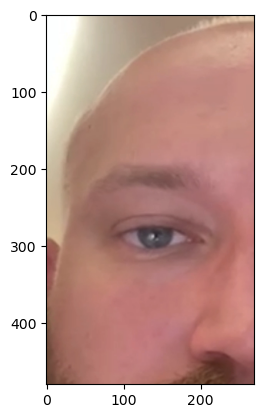

In [53]:
cap = cv2.VideoCapture('eye_movement.mp4')
while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
    cv2.imshow('frame', frame)
    #plt.imshow (frame[:, :, ::-1]) Для того чтобы кадр сохранился в блокноте
    key=cv2.waitKey(30)
    
    if key==27:
        break
cap.release()
cv2.destroyAllWindows()

#####  2. Найдем координаты правого глаза

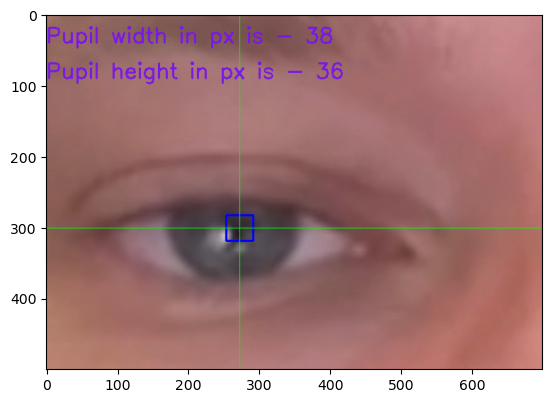

In [54]:
cap = cv2.VideoCapture('eye_movement.mp4')

while True:
    ret, frame = cap.read()
    roi = frame [850:1350,300:1000] #Выделяем ROI для упрощения процесса. 
    row, col, _ = roi.shape #Получаем ширину и высоту выделенного фрагмента
    
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY) #Конверция в серые тона
    gray_roi = cv2.GaussianBlur (gray_roi, (7,7), 0) #Сглаживаем изображение
    __, threshold = cv2.threshold (gray_roi, 55, 255, cv2.THRESH_BINARY_INV) #Отсекаем по трэшхолду 
    contours, __ = cv2.findContours (threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Используем функцию для поиска контуров
                                                                                        #объектов после выделения их по порогу
    contours = sorted (contours, key = lambda x: cv2.contourArea(x), reverse = True)    #Сортируем все контуры от большего к 
                                                                                        #меньшему, чтобы убрать дефекты
    
    for cnt in contours:
        (x,y,w,h) = cv2.boundingRect(cnt) #Получаем из контуров границы прямоугольника
        #cv2.drawContours (roi, [cnt], -1, (0,0,255), 1)
        cv2.rectangle(roi, (x,y), (x+w, y+h), (255,0,0),2) #Выделяем зрачкок в прямоугольник
        cv2.line (roi, (x+int(w/2),0), (x+int(w/2),row), (0,255,0),1) #Рисуем горизонтальную линию
        cv2.line (roi, (0,y+int(h/2)), (col, y+int(h/2)), (0,255,0), 1) #Рисуем вертикальную линию
        cv2.putText (roi, 'Pupil width in px is - ' + str (w),
                    (0,40),
                     
                    fontFace = cv2.FONT_ITALIC,
                    lineType =cv2.LINE_8, 
                    fontScale =1, 
                    color =(231,23,123),
                    thickness =2);
        cv2.putText (roi, 'Pupil height in px is - ' + str (h),
                    (0,90),
                     
                    fontFace = cv2.FONT_ITALIC,
                    lineType =cv2.LINE_8, 
                    fontScale =1, 
                    color =(231,23,123),
                    thickness =2);
        break
    
    cv2.imshow ('roi', roi)
    #plt.imshow (roi[:, :, ::-1]) #Для сохранения в блокноте изображения
    #cv2.imshow('gray', gray_roi)
    #cv2.imshow('thresh', threshold)
    
    key=cv2.waitKey(30)
    if key==27:
        break
    
cap.release()
cv2.destroyAllWindows()

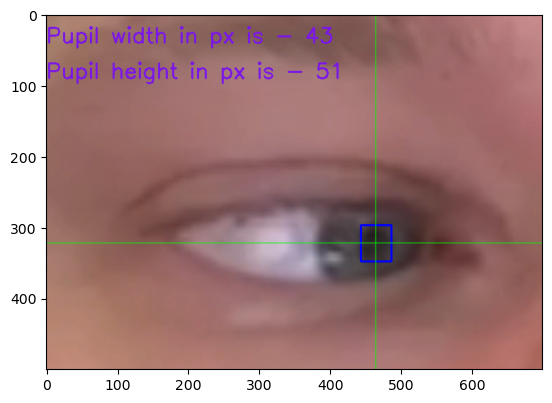

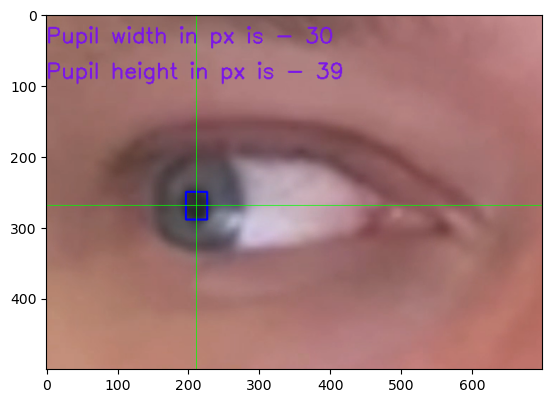

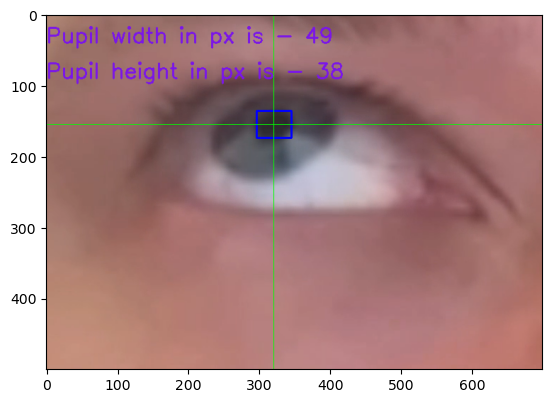

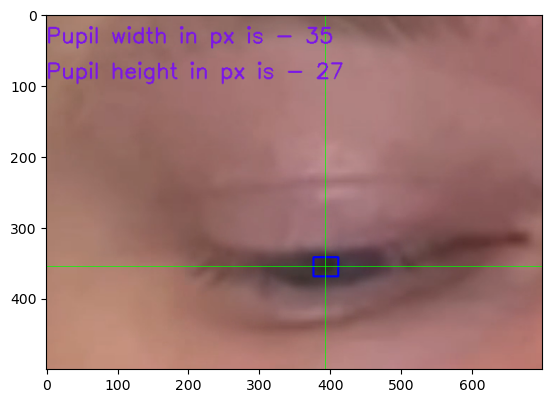